In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
sns.set(style="whitegrid", font_scale=1.2, context="talk", palette=sns.color_palette("bright"), color_codes=False)
matplotlib.rcParams['mathtext.fontset'] = 'cm'

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [5]:
df

,x
0,580.38
1,581.86
2,580.97
3,580.80
4,579.79
...,...
93,578.52
94,579.74
95,579.31
96,579.89


# create data for AR($p$) in Dickey-Fuller test

In [6]:
def xyArray(df, p):
    dt = df.copy()
    dt.x = dt.x - dt.x.mean()
    X = np.ones((dt.shape[0] - p - 2 + 1, 1))
    X = np.concatenate([X, dt[p:-1]], axis=1)
    for i in range(1, p):
        X = np.concatenate([X, dt[p-i+1:-i].to_numpy() - dt[p-i:-i-1].to_numpy()], axis=1)
    y = dt[p+1:].to_numpy() - dt[p:-1].to_numpy()
    # print(y)
    return X, y


In [7]:
def AR(df, p):
    X,y = xyArray(df, p)
    beta = np.linalg.inv(X.T@X)@X.T@y
    S = np.sum((y - X@beta)**2)
    xbar = df[:-1].to_numpy().mean()
    e = np.sum((df[:-1].to_numpy() - xbar)**2)
    return beta, np.sqrt(S*e) / (df.shape[0] - p-2)

In [8]:
a = AR(df, 1)

In [9]:
a[0]

array([[-0.0241164],
       [-0.1780461]])

In [10]:
a[1]

0.928253791874368

In [11]:
djao = pd.read_csv('djao2.csv')

In [12]:
djao.drop(djao.columns[djao.columns.str.contains('Unnamed',case = True)],axis = 1, inplace = True)

In [13]:
djao

,DJ,AO
0,3621.63,1941.5
1,3634.21,1938.3
2,3615.76,1912.9
3,3633.65,1903.6
4,3630.85,1902.6
...,...,...
246,3751.22,2063.6
247,3775.83,2051.6
248,3846.73,2061.1
249,3829.89,2077.8


In [14]:
d1 = djao.to_numpy()

In [15]:
d2 = d1.copy()

In [16]:
d = (d2[1:] - d1[:-1]) / d1[:-1]

In [17]:
d *= 100

In [18]:
d

array([[ 0.34735741, -0.16482101],
       [-0.50767567, -1.31042666],
       [ 0.49477841, -0.48617283],
       [-0.0770575 , -0.05253204],
       [-0.48473498,  1.2036161 ],
       [-1.03646302, -0.07270839],
       [-1.07836009,  0.05716959],
       [ 0.27648675, -0.30646167],
       [-0.20496078,  0.48455166],
       [ 0.09492196,  0.9281344 ],
       [ 0.69402305, -0.17980992],
       [-0.04708916, -0.03602676],
       [ 0.00785189,  0.46851671],
       [-0.31349017,  0.66618838],
       [ 0.7310583 ,  0.42252087],
       [-0.09354641,  0.21797536],
       [ 0.26552927,  1.08750632],
       [ 0.32699052,  1.01576182],
       [-0.4267864 ,  0.18327719],
       [ 0.03097418,  0.1829419 ],
       [ 0.24185854,  0.67120719],
       [-0.00779204, -0.57848809],
       [ 0.27997874,  0.52268245],
       [ 0.51176874,  1.14784656],
       [ 0.2236562 ,  0.58680892],
       [ 0.34658225,  0.54963599],
       [-0.19191118, -0.47950132],
       [ 0.26902721, -1.14671164],
       [-0.24526076,

In [19]:
all = np.concatenate([np.ones((250,1)), d], axis=1)

In [20]:
X = all[0:-1]

In [21]:
X.shape

(249, 3)

In [22]:
y = all[1:,1:]

In [23]:
y.shape

(249, 2)

In [24]:
beta = np.linalg.inv(X.T@X)@X.T@y

In [25]:
beta

array([[ 0.02748849,  0.01229704],
       [-0.01517162,  0.67142411],
       [ 0.03574866,  0.0991333 ]])

In [26]:
import statsmodels.api as sm

In [27]:
def var(X):
    N, T = X.shape
    temp1 = np.zeros((N, N))
    temp2 = np.zeros((N, N))
    for t in range(1, T):
        temp1 += np.outer(X[:, t], X[:, t - 1])
        temp2 += np.outer(X[:, t - 1], X[:, t - 1])
    A = temp1 @ np.linalg.inv(temp2)
    # mat = np.append(X, np.zeros((N, pred_step)), axis = 1)
    # for s in range(pred_step):
    #     mat[:, T + s] = A @ mat[:, T + s - 1]
    return A

In [28]:
airpass = pd.read_csv("airpass.txt", delimiter=';')

In [29]:
airpass

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [56]:
airpass['D^2'] = airpass.Passengers.diff(2)

In [57]:
airpass

,Month,Passengers,logpass,D1,D2,D^2
0,1949-01,112,4.718499,NaN,NaN,NaN
1,1949-02,118,4.770685,6.0,NaN,NaN
2,1949-03,132,4.882802,14.0,8.0,20.0
3,1949-04,129,4.859812,-3.0,-17.0,11.0
4,1949-05,121,4.795791,-8.0,-5.0,-11.0
...,...,...,...,...,...,...
139,1960-08,606,6.406880,-16.0,-103.0,71.0
140,1960-09,508,6.230481,-98.0,-82.0,-114.0
141,1960-10,461,6.133398,-47.0,51.0,-145.0
142,1960-11,390,5.966147,-71.0,-24.0,-118.0


<AxesSubplot:>

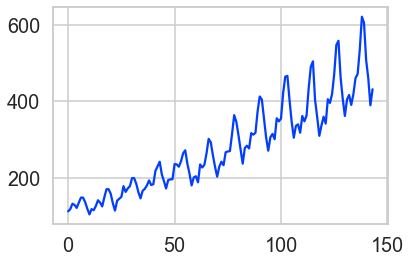

In [30]:
airpass.Passengers.plot()

In [31]:
airpass['logpass'] = airpass.Passengers.apply(np.log)

<AxesSubplot:>

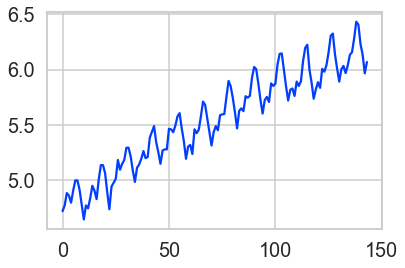

In [32]:
airpass.logpass.plot()

In [33]:
logpass = airpass.logpass.to_numpy()

In [34]:
logpass[11:]

array([4.77068462, 4.74493213, 4.83628191, 4.94875989, 4.90527478,
       4.82831374, 5.00394631, 5.13579844, 5.13579844, 5.06259503,
       4.89034913, 4.73619845, 4.94164242, 4.97673374, 5.01063529,
       5.18178355, 5.0937502 , 5.14749448, 5.18178355, 5.29330482,
       5.29330482, 5.21493576, 5.08759634, 4.98360662, 5.11198779,
       5.14166356, 5.19295685, 5.26269019, 5.19849703, 5.20948615,
       5.38449506, 5.43807931, 5.48893773, 5.34233425, 5.25227343,
       5.14749448, 5.26785816, 5.27811466, 5.27811466, 5.46383181,
       5.45958551, 5.433722  , 5.49306144, 5.5759491 , 5.60580207,
       5.46806014, 5.35185813, 5.19295685, 5.30330491, 5.31811999,
       5.23644196, 5.45958551, 5.42495002, 5.45532112, 5.5759491 ,
       5.71042702, 5.68017261, 5.55682806, 5.433722  , 5.31320598,
       5.433722  , 5.48893773, 5.45103845, 5.58724866, 5.59471138,
       5.59842196, 5.75257264, 5.89715387, 5.84932478, 5.74300319,
       5.61312811, 5.46806014, 5.62762111, 5.64897424, 5.62401

In [35]:
diff_logap = logpass[12:] - logpass[:-12]

In [36]:
diff_logap.shape

(132,)

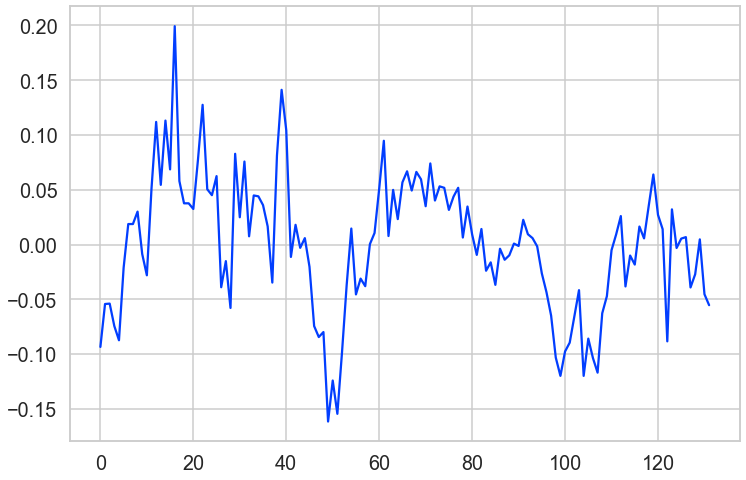

In [37]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(diff_logap-diff_logap.mean())

In [38]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

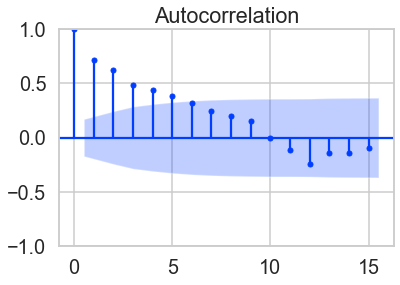

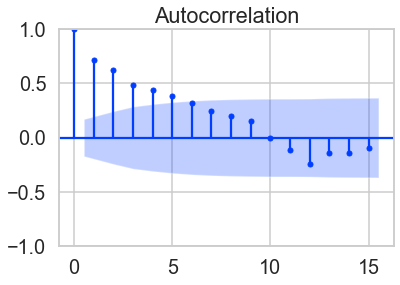

In [39]:
plot_acf(diff_logap-diff_logap.mean(), lags = 15) 

c:\Users\RedmiBook\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


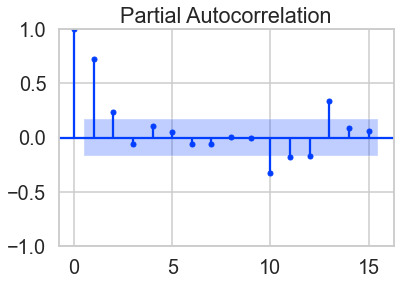

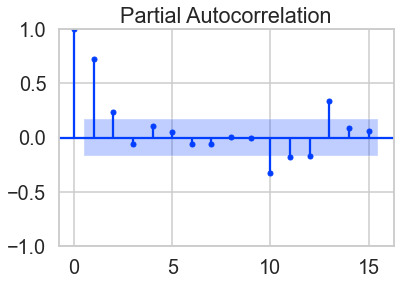

In [40]:
plot_pacf(diff_logap-diff_logap.mean(), lags=15)

In [41]:
from statsmodels.tsa.stattools import adfuller

In [42]:
res = adfuller(diff_logap-diff_logap.mean())
print(res)

(-2.7095768189885647, 0.0723956718176956, 12, 119, {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}, -424.76083484995365)


Choose AR(1), MA(6) model

In [43]:
from statsmodels.tsa.arima.model import ARIMA

In [44]:
arima_model = ARIMA(diff_logap, order=(1,0,12))

In [45]:
model = arima_model.fit()

c:\Users\RedmiBook\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:                ARIMA(1, 0, 12)   Log Likelihood                 254.326
Date:                Wed, 22 Feb 2023   AIC                           -478.651
Time:                        07:09:56   BIC                           -435.409
Sample:                             0   HQIC                          -461.080
                                - 132                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1178      0.014      8.279      0.000       0.090       0.146
ar.L1          0.7502      0.319      2.350      0.019       0.125       1.376
ma.L1         -0.0670      0.353     -0.190      0.849      -0.758       0.624
ma.L2          0.1371      0.284      0.484      0.629      -0.419       0.693
ma.L3         -0.0313      0.317     -0.099      0.922      -0.653       0.591
ma.L4         -0.1090      0.249     -0.438      0.661      -0.597       0.379
ma.L5          0.2069      0.180      1.152      0.249      -0.145       0.559
ma.L6          0.0461      0.213      0.217      0.829      -0.372       0.464
ma.L7          0.0810      0.222      0.364      0.716      -0.355       0.517
ma.L8          0.0310      0.200      0.155      0.876      -0.360       0.422
ma.L9          0.1597      0.206      0.774      0.439      -0.245       0.564
ma.L10         0.0512      0.194      0.264      0.792      -0.329       0.432
ma.L11         0.2173      0.193      1.124      0.261      -0.162       0.596
ma.L12        -0.5571      0.212     -2.624      0.009      -0.973      -0.141
sigma2         0.0012      0.000      5.094      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   1.02   Jarque-Bera (JB):                 8.26
Prob(Q):                              0.31   Prob(JB):                         0.02
Heteroskedasticity (H):               0.51   Skew:                             0.02
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
forcast_12 = model.forecast(12)

In [48]:
forcast_12

array([0.08623998, 0.08634938, 0.14653092, 0.09084711, 0.08978032,
       0.11530357, 0.11261845, 0.1145959 , 0.12118791, 0.11180828,
       0.1236688 , 0.1218936 ])

In [49]:
prev_12 = airpass.Passengers.to_numpy()[-24:-12]


In [50]:
predicts = np.exp(forcast_12)*prev_12
print(predicts)

[392.42444194 372.84400396 470.07115618 433.66021713 459.4522572
 529.68503315 613.32424311 626.87388116 522.65153784 455.14746666
 409.65404674 457.50173226]


In [51]:
airpass.Passengers.to_numpy()[-12:] - predicts

array([ 24.57555806,  18.15599604, -51.07115618,  27.33978287,
        12.5477428 ,   5.31496685,   8.67575689, -20.87388116,
       -14.65153784,   5.85253334, -19.65404674, -25.50173226])